In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_csv("C:/Users/karth/Dropbox/PC/Downloads/Paper1/MonthWiseMarketArrivals_Clean.csv",sep=',')
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [3]:
data.shape

(10227, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [5]:
data.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date'],
      dtype='object')

In [7]:
data.isna().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [8]:
data.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [10]:
data.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


In [17]:
data.iloc[:,2:7] = data.iloc[:,2:7].astype(int)

In [28]:
data["state"] = data.market.str.split("(").str[-1]
data["city"] = data.market.str.split("(").str[0]
data["state"] = data.state.str.split(')').str[0]

In [30]:
data_state = data.groupby(["state","market"], as_index = False).count()

In [31]:
state_now = ['PB', 'UP', 'GUJ', 'MS', 'RAJ', 'BANGALORE', 'KNT', 'BHOPAL', 'OR',
       'BHR', 'WB', 'CHANDIGARH', 'CHENNAI', 'bellary', 'podisu', 'UTT',
       'DELHI', 'MP', 'TN', 'Podis', 'GUWAHATI', 'HYDERABAD', 'JAIPUR',
       'WHITE', 'JAMMU', 'HR', 'KOLKATA', 'AP', 'LUCKNOW', 'MUMBAI',
       'NAGPUR', 'KER', 'PATNA', 'CHGARH', 'JH', 'SHIMLA', 'SRINAGAR',
       'TRIVENDRUM']
state_new =['PB', 'UP', 'GUJ', 'MS', 'RAJ', 'KNT', 'KNT', 'MP', 'OR',
       'BHR', 'WB', 'CH', 'TN', 'KNT', 'TN', 'UP',
       'DEL', 'MP', 'TN', 'TN', 'ASM', 'AP', 'RAJ',
       'MS', 'JK', 'HR', 'WB', 'AP', 'UP', 'MS',
       'MS', 'KER', 'BHR', 'HR', 'JH', 'HP', 'JK',
       'KEL']
data.state = data.state.replace(state_now, state_new)

In [32]:
data["date"] = data["month"] + "-" + data["year"].map(str)
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [33]:
index = pd.to_datetime(data.date)
data.date = pd.DatetimeIndex(data.date)
data.index

RangeIndex(start=0, stop=10227, step=1)

In [34]:
data.date = pd.DatetimeIndex(data.date)
data.dtypes

market              object
month               object
year                 int32
quantity             int32
priceMin             int32
priceMax             int32
priceMod             int32
state               object
city                object
date        datetime64[ns]
dtype: object

In [40]:
data2010 = data[data.year ==2010]
data2010_bang =data[(data.year ==2010)& (data.city =="BANGALORE")]
data2010_city = data2010.groupby(["city"]).sum()
data2010_city = data2010.groupby(['city'],as_index=False).quantity.sum()
data2010_city = data2010_city.sort_values(by = "quantity", ascending = False)

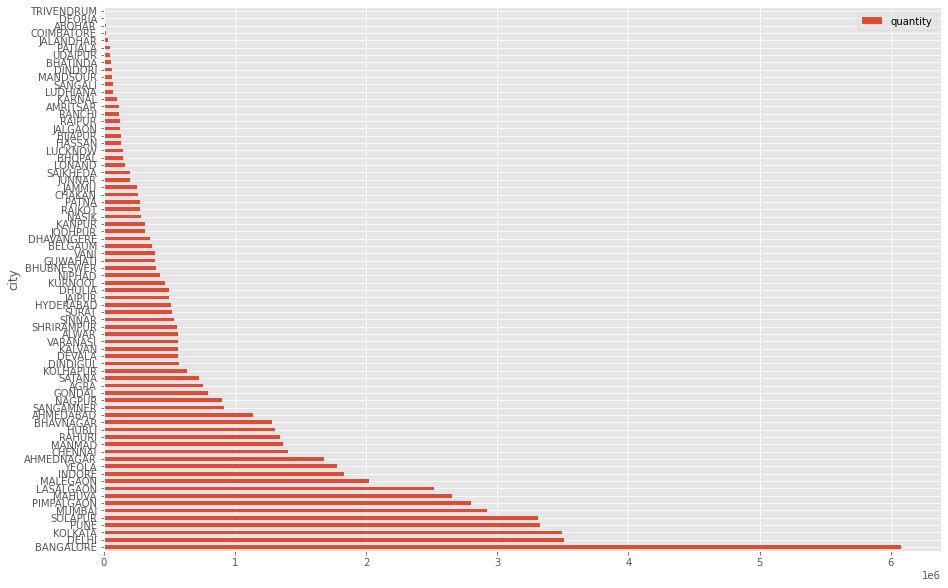

In [41]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
data2010_city.plot(kind ="barh", x = 'city', y = 'quantity')
plt.show()


In [43]:
data_bang = data[data.city == "BANGALORE"]
pd.set_option("precision", 0)
data_bang.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146,1e+02,146,146,146
mean,2010,5e+05,558,1314,1044
std,4,3e+05,381,911,668
min,2004,6e+04,145,338,320
25%,2007,3e+05,307,685,551
50%,2010,4e+05,448,1019,836
75%,2013,7e+05,653,1636,1326
max,2016,2e+06,2377,4698,3430


In [45]:
data_bang.index

Int64Index([716, 717, 718, 719, 720, 721, 722, 723, 724, 725,
            ...
            852, 853, 854, 855, 856, 857, 858, 859, 860, 861],
           dtype='int64', length=146)

In [46]:
data_bang = data_bang.sort_values(by="date")
data_bang.index = pd.PeriodIndex(data_bang.date, freq='M')


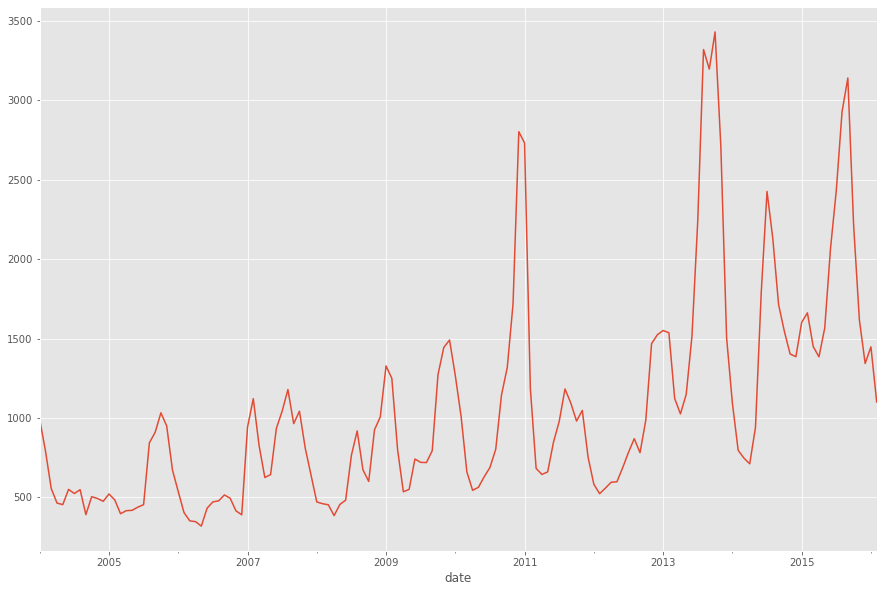

In [48]:
data_bang.priceMod.plot()
plt.show()

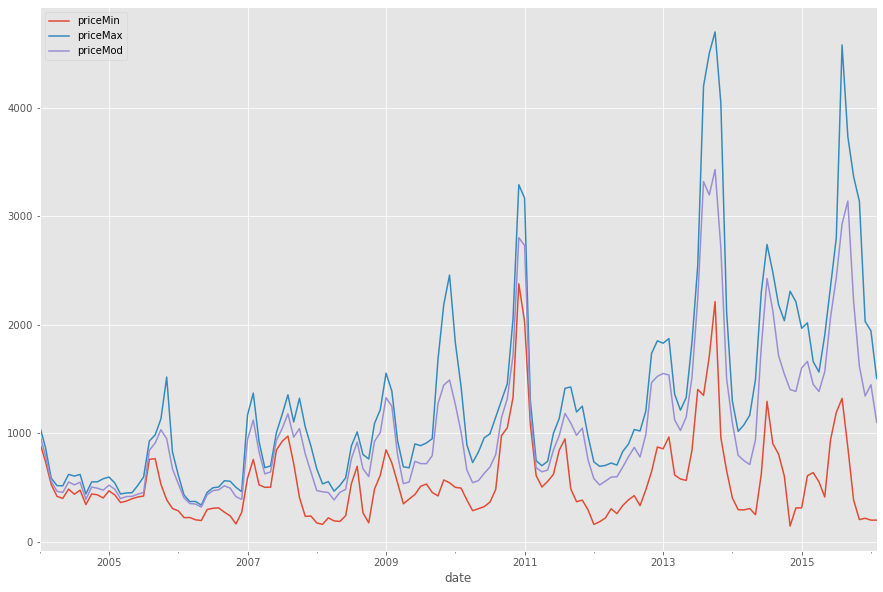

In [49]:
data_bang.plot(kind="line", y=["priceMin" ,"priceMax" ,"priceMod"])
plt.show()

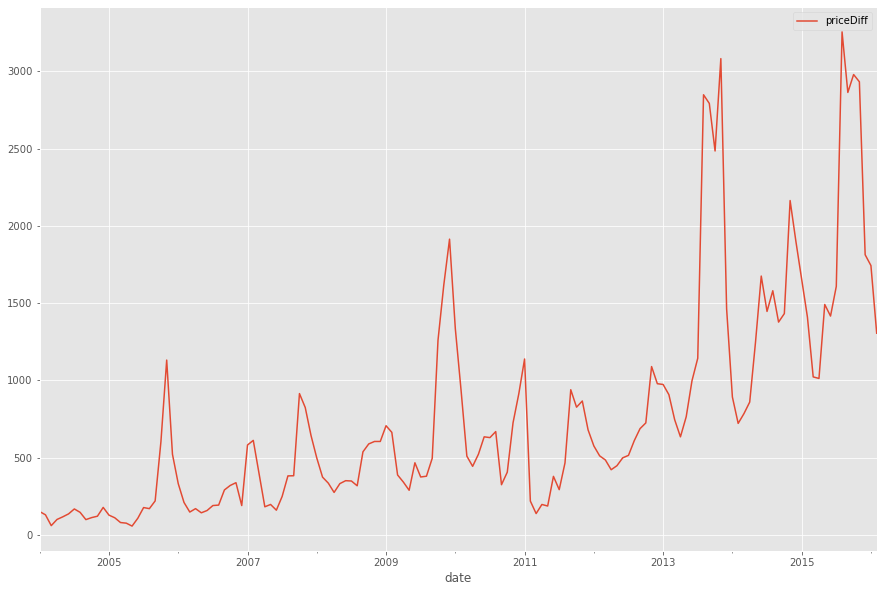

In [50]:
data_bang["priceDiff"] = data_bang["priceMax"] - data_bang["priceMin"]
data_bang.plot(y="priceDiff")
plt.show()

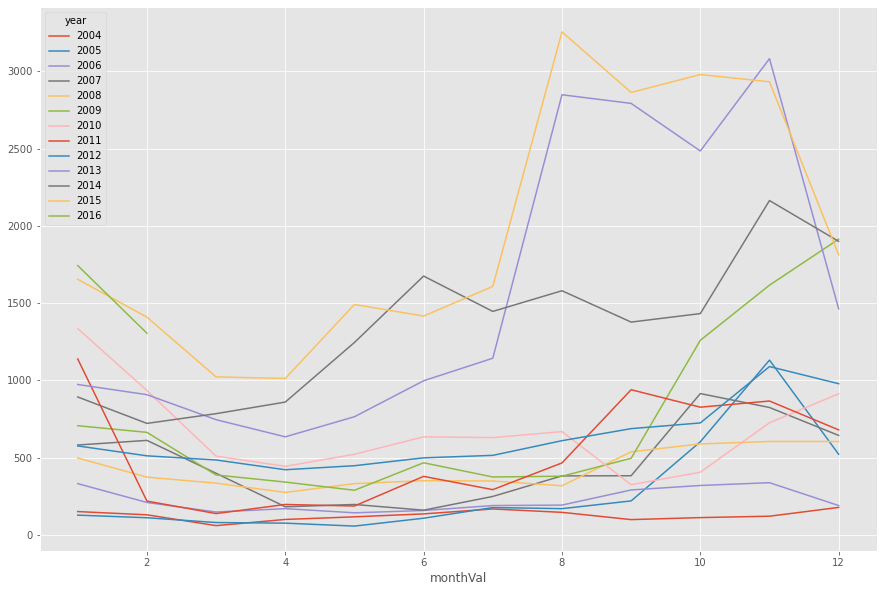

In [51]:
data_bang["monthVal"] = pd.DatetimeIndex(data_bang["date"]).month
data_bangPivot = pd.pivot_table(data_bang, values = "priceDiff", columns = "year", index = "monthVal")
data_bangPivot.plot()
plt.show()

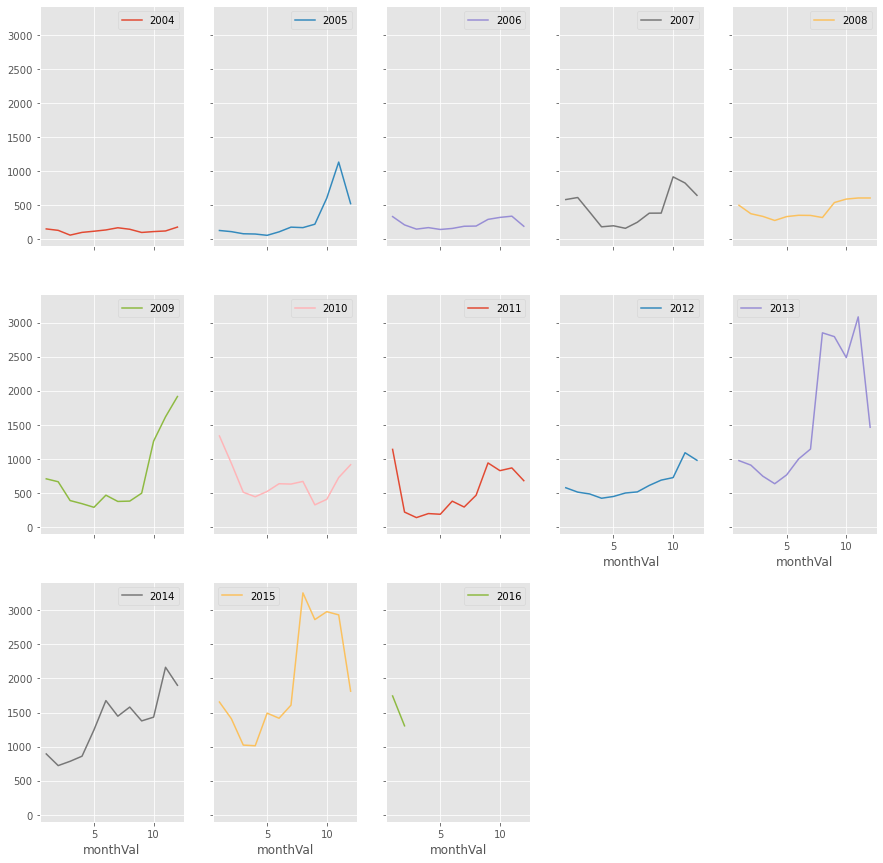

In [52]:
data_bangPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)
plt.show()

<AxesSubplot:ylabel='Frequency'>

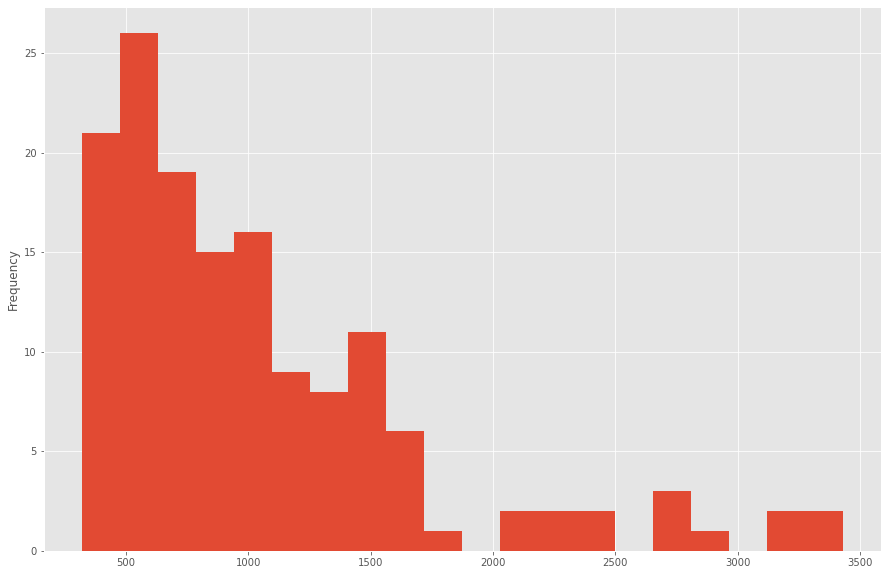

In [53]:
data_bang.priceMod.plot(kind="hist", bins=20)

<AxesSubplot:ylabel='Frequency'>

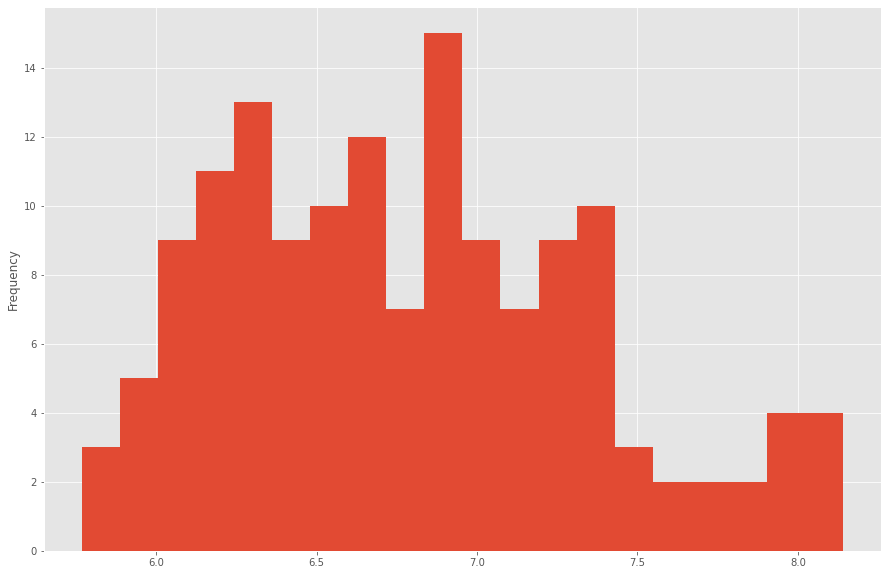

In [55]:
data_bang["log_priceMod"] = np.log(data_bang.priceMod)
data_bang.log_priceMod.plot(kind="hist", bins=20)

<AxesSubplot:xlabel='date'>

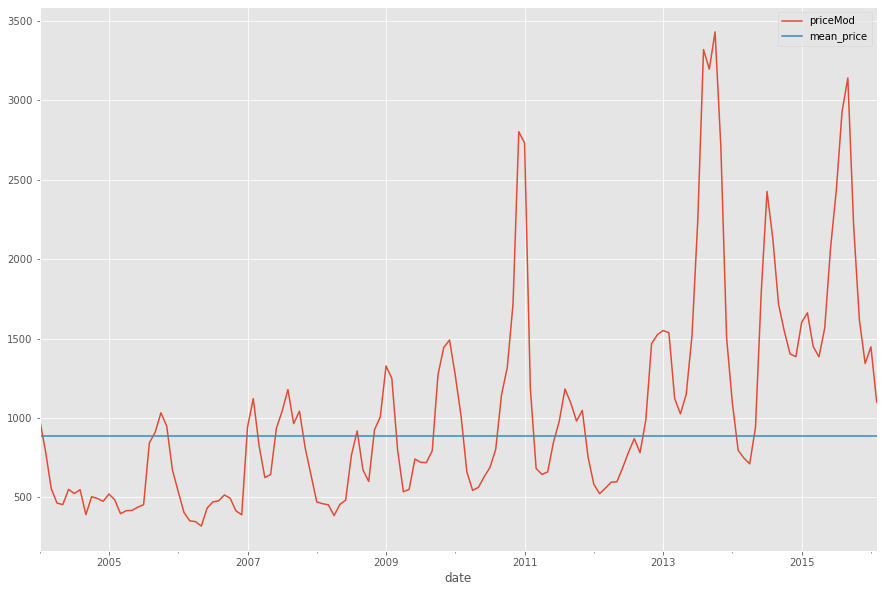

In [58]:
data_bang_mean = data_bang.log_priceMod.mean()
data_bang["mean_price"] = np.exp(data_bang_mean)
data_bang.plot(kind="line", x="date", y=["priceMod", "mean_price"])

In [59]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [60]:
mean_modelRMSE = RMSE(data_bang.priceMod, data_bang.mean_price)
mean_modelRMSE

683.9533483996255

In [62]:
Result_df = pd.DataFrame(columns =["Model","Forcast","RMSE"])
Result_df.loc[0,"Model"] = "Mean Model"
Result_df.loc[0,"Forcast"] = np.exp(data_bang_mean)
Result_df.loc[0,"RMSE"] = mean_modelRMSE
Result_df

,Model,Forcast,RMSE
0,Mean Model,885,684
